In [1]:
import sys 
sys.path.append('../Python-modules/') #For bee_helpers and file_helpers 
from bee_helpers import calc_trip_lengths, get_forager_bee_ids, get_random_bee_ids, get_all_bee_ids
from file_helpers import delete_detection_caches_for_date, detections_to_presence, create_presence_cache_filename, create_presence_cache_filename, cache_location_prefix, cache_detections_from_database, cache_death_dates, last_days_caches
from datetime import timedelta, datetime
from pathlib import Path
from bee_cache import Cache, CacheType, CacheFormat; c=Cache()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.5/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


In [2]:
c.load('real_forager_lives')

,born,died,lifespan,foraging_min_date,foraging_max_date,foraging_min_age,foraging_max_age
bee_id,,,,,,,
135,2016-07-19,2016-08-24,36.0,2016-08-01,2016-08-05,13 days,17 days
199,2016-07-19,2016-08-20,32.0,2016-07-31,2016-08-18,12 days,30 days
217,2016-07-19,2016-08-03,15.0,2016-07-28,2016-08-02,9 days,14 days
220,2016-07-19,2016-08-06,18.0,2016-08-01,2016-08-05,13 days,17 days
228,2016-07-19,2016-08-10,22.0,2016-07-31,2016-08-05,12 days,17 days
233,2016-07-19,2016-08-15,27.0,2016-07-28,2016-08-05,9 days,17 days
253,2016-07-19,2016-08-05,17.0,2016-07-31,2016-08-03,12 days,15 days
319,2016-07-19,2016-08-23,35.0,2016-07-28,2016-08-22,9 days,34 days
337,2016-07-19,2016-08-18,30.0,2016-08-08,2016-08-18,20 days,30 days


In [3]:
c.load('foragers_from_groups')

,bee_id,group_id,date,location
bee_id,,,,
769,769,1,2016-07-28,Stock-F1
818,818,1,2016-07-28,Stock-F1
319,319,1,2016-07-28,Stock-F1
644,644,1,2016-07-28,Stock-F1
392,392,1,2016-07-28,Stock-F1
648,648,1,2016-07-28,Stock-F1
400,400,1,2016-07-28,Stock-F1
931,931,1,2016-07-28,Stock-F1
675,675,1,2016-07-28,Stock-F1


In [105]:
df = pd.read_csv('~/mnt/janek/caches/Detections/DETECTIONS-2016-08-27_23:00:00.csv').rename(columns={"Unnamed: 0":"index"})

In [109]:
df.iloc[3141]

index                                            3141
timestamp            2016-08-27 23:00:06.578872+00:00
frame_id                         11865680282386710913
detection_idx                                      89
track_id                         17448736101937924741
x_pos                                            3551
y_pos                                            2401
orientation                                  0.658987
x_pos_hive                                    145.468
y_pos_hive                                    11.6544
orientation_hive                            -0.907964
bee_id                                           3197
bee_id_confidence                            0.976594
cam_id                                              2
Name: 3141, dtype: object

In [5]:
df.iloc[2]

Unnamed: 0                                          2
timestamp            2016-08-27 22:00:00.160393+00:00
frame_id                         12280067637534355162
detection_idx                                      47
track_id                         14500783317367276127
x_pos                                             236
y_pos                                            1425
orientation                                  -2.01088
x_pos_hive                                    84.6757
y_pos_hive                                    223.079
orientation_hive                               2.6867
bee_id                                           1266
bee_id_confidence                            0.108947
cam_id                                              2
Name: 2, dtype: object

In [55]:
df = pd.read_csv('~/mnt/janek/caches/Presence/PRESENCE-counts-2016-08-11_00_num_hours_24_int_size_120_conf_02_cams_0123.csv').drop(columns=['Unnamed: 0'])

In [56]:
arr = np.array(df)

In [86]:
sub = arr[300:340, 100:340]
sub[sub >= 90] = 90

Text(192.5,0.5,'Bee')

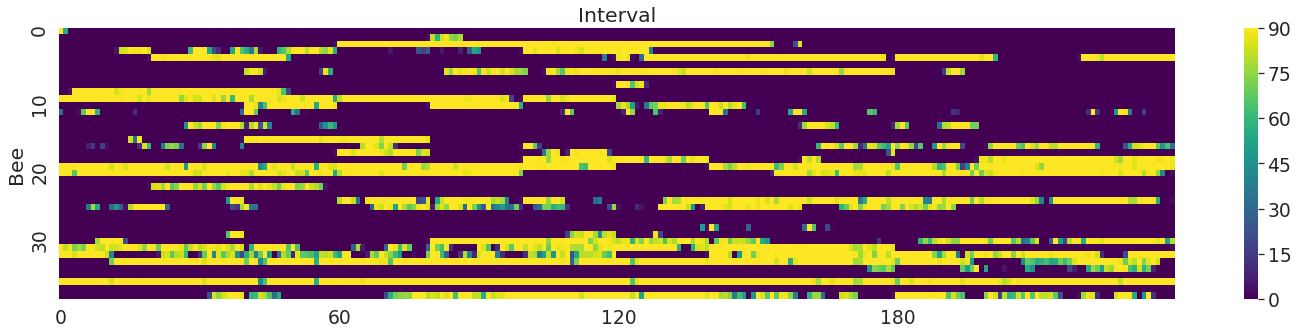

In [98]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(25, 5))
sns.set(font_scale=1.7)
ax = sns.heatmap(sub, xticklabels=60, yticklabels=10, cmap="viridis")
ax.set_title('Interval')
ax.set_ylabel('Bee')

In [116]:
g099 = c.load('gaps_099_displayable').drop(columns=['activity_description', 'gap_start_frame', 'origin_for_entry','origin_for_exit'])
g099['confidence_threshold'] = 0.99

In [117]:
g099.iloc[20]

age                                                                 1
age_group                                                           0
bee_id                                                           1512
cam_id_entry                                                        1
cam_id_exit                                                         1
entry                                             2016-07-21 05:07:30
entry_closest_detection_timestamp    2016-07-21 05:07:30.061867+00:00
entry_frame                                      16701438718304484593
entry_x                                                       223.979
entry_y                                                       30.2088
exit                                              2016-07-21 04:58:30
exit_closest_detection_timestamp     2016-07-21 04:58:29.892067+00:00
exit_frame                                       10789251703637821099
exit_x                                                        279.902
exit_y              